# This script demonstrates the k-means clustering algorithm for MNIST dataset
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment04

# Import Packages and open file

## Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Make array from .csv file :

In [2]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

## Normalize the values of the input data to be $[0,1]$ :

In [3]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

## Make a matrix each column of which represents an images in a vector form :

In [4]:
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# Define functions

## Compute distance between two vectors $x$ and $y$ :

In [5]:
def computeDistance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

## Set initial cluster randomly :

In [6]:
def initializeLabel(n_cluster):
    list_cluster = [random.randrange(0,n_cluster) for i in range(num_image)]
    return list_cluster

## Compute centroid image of each cluster :

In [7]:
def computeCentroid(n_cluster):
    list_centroid = [np.zeros((size_row*size_col)) for i in range(n_cluster)]
    n_imgs = [0 for i in range(n_cluster)]
    
    for i in range(num_image):
        label = list_cluster[i]
        im_vector = list_image[:,i]
        list_centroid[label] += im_vector
        n_imgs[label] += 1
        #print(label)
        
    for cluster in range(n_cluster):
        list_centroid[cluster] = list_centroid[cluster] / n_imgs[cluster]
        
    return np.array(list_centroid)

## Make distance array :

In [8]:
def makeListDist(n_cluster, list_centroid):
    list_dist = []
    for i in range(num_image):
        temp_dist = [
            computeDistance(
                list_centroid[j],list_image[:,i]
            ) for j in range(n_cluster)
        ]
        
        list_dist.append(temp_dist)
    
    return list_dist

## Assign labels according to the distance array :

In [9]:
def assignLabel(n_cluster,list_dist):
    for i in range(num_image):
        this_dist = list_dist[i]
        new_cluster = this_dist.index(min(this_dist))
        list_cluster[i] = new_cluster
        #print(this_dist)

## Pick the representative labels for each cluster :

In [10]:
def pickRepresentative(n_cluster):
    temp_repre = [[0 for j in range(n_cluster)] for i in range(n_cluster)]
    list_repre = [None for i in range(n_cluster)]
    for i in range(num_image):
        i_label = list_label[i]
        i_cluster = list_cluster[i]
        temp_repre[i_cluster][i_label] += 1
        
    for i in range(n_cluster):
        list_repre[i] = temp_repre[i].index(max(temp_repre[i]))
        
    return np.array(list_repre)

## Compute energy functional :

In [11]:
def computeEnergy(list_image, list_cluster):
    energy = 0
    for i in range(num_image):
        this_cluster = list_cluster[i]
        this_img = list_image[:,i]
        energy += computeDistance(this_img,list_centroid[this_cluster])
        
    energy /= num_image
    return energy

## Compute accuracy with answer label :

In [12]:
def computeAccuracy(list_cluster, list_label):
    repre = pickRepresentative(10)
    corr = 0
    for i in range(num_image):
        this_cluster = list_cluster[i]
        if repre[this_cluster] == list_label[i]:
            corr += 1
    corr /= num_image
    return corr

# Run k-means algorithm

## Do initialize and first iteration, and show first centroid images :

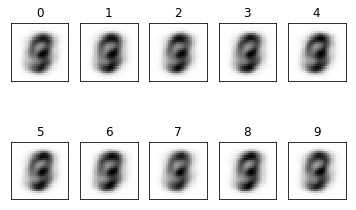

In [13]:
n_cluster = 10

list_cluster = initializeLabel(n_cluster)
list_centroid = computeCentroid(n_cluster)

for i in range(n_cluster):
    plt.subplot(2,(n_cluster+1)//2,i+1)
    plt.title(i)
    plt.imshow(
        list_centroid[i].reshape((size_row,size_col)),
        cmap='Greys',
        interpolation='None'
    )
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()

list_dist = makeListDist(n_cluster,list_centroid)
assignLabel(n_cluster,list_dist)

## Run k-means algorithm until the centroid does not change :

In [14]:
iter = 0
list_energy = []
list_accuracy = []

while(1):
    new_centroid = computeCentroid(n_cluster)
    
    if np.array_equal(list_centroid,new_centroid):
        break
        
    list_centroid = new_centroid
    
    iter+=1
    print("iteration",iter)
    
    energy = computeEnergy(list_image,list_cluster)
    print("energy :",energy)
    list_energy.append(energy)
    
    accuracy = computeAccuracy(list_cluster,list_label)
    print("accuracy :",accuracy)
    list_accuracy.append(accuracy)
    
    list_dist = makeListDist(n_cluster,list_centroid)
    assignLabel(n_cluster,list_dist)

iteration 1
energy : 6.585433560429742
accuracy : 0.344
iteration 2
energy : 6.317454316392555
accuracy : 0.4559
iteration 3
energy : 6.248936991368883
accuracy : 0.5042
iteration 4
energy : 6.228824628106806
accuracy : 0.5303
iteration 5
energy : 6.215227326637998
accuracy : 0.5544
iteration 6
energy : 6.203466488401823
accuracy : 0.5766
iteration 7
energy : 6.1935935510688065
accuracy : 0.5928
iteration 8
energy : 6.186742742192268
accuracy : 0.6038
iteration 9
energy : 6.18259305257497
accuracy : 0.6109
iteration 10
energy : 6.1799583672513485
accuracy : 0.6168
iteration 11
energy : 6.178775306329436
accuracy : 0.6204
iteration 12
energy : 6.178111215034533
accuracy : 0.6222
iteration 13
energy : 6.177499994133579
accuracy : 0.6245
iteration 14
energy : 6.177005701275123
accuracy : 0.6252
iteration 15
energy : 6.176447733516951
accuracy : 0.6261
iteration 16
energy : 6.175963413149895
accuracy : 0.6259
iteration 17
energy : 6.175549328102125
accuracy : 0.6257
iteration 18
energy : 6

## Show the result centroid and energy, accuracy graphs :

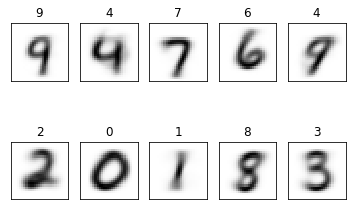

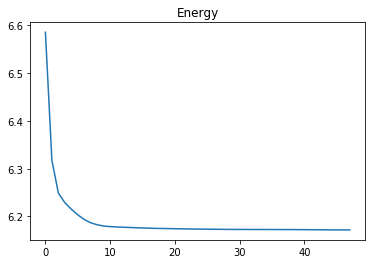

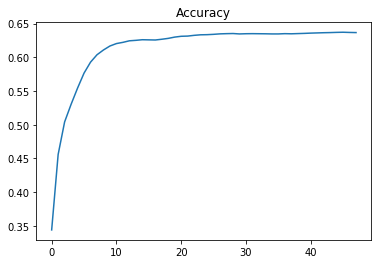

In [15]:
list_repre = pickRepresentative(n_cluster)
    
for i in range(n_cluster):
    plt.subplot(2,(n_cluster+1)//2,i+1)
    plt.title(list_repre[i])
    plt.imshow(
        list_centroid[i].reshape((size_row,size_col)),
        cmap='Greys',
        interpolation='None'
    )
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
        
plt.show()

plt.title("Energy")
plt.plot(list_energy)
plt.show()

plt.title("Accuracy")
plt.plot(list_accuracy)

plt.show()